## Step 4.1: Create redshift tables and copy data

In the following we will run some sql statements to create tables in the redshift cluster ("create_cluster.py" must be run before to create the cluster) and fill them with the cleaned data copied from the S3 bucket.

The tables will be defined after this model:

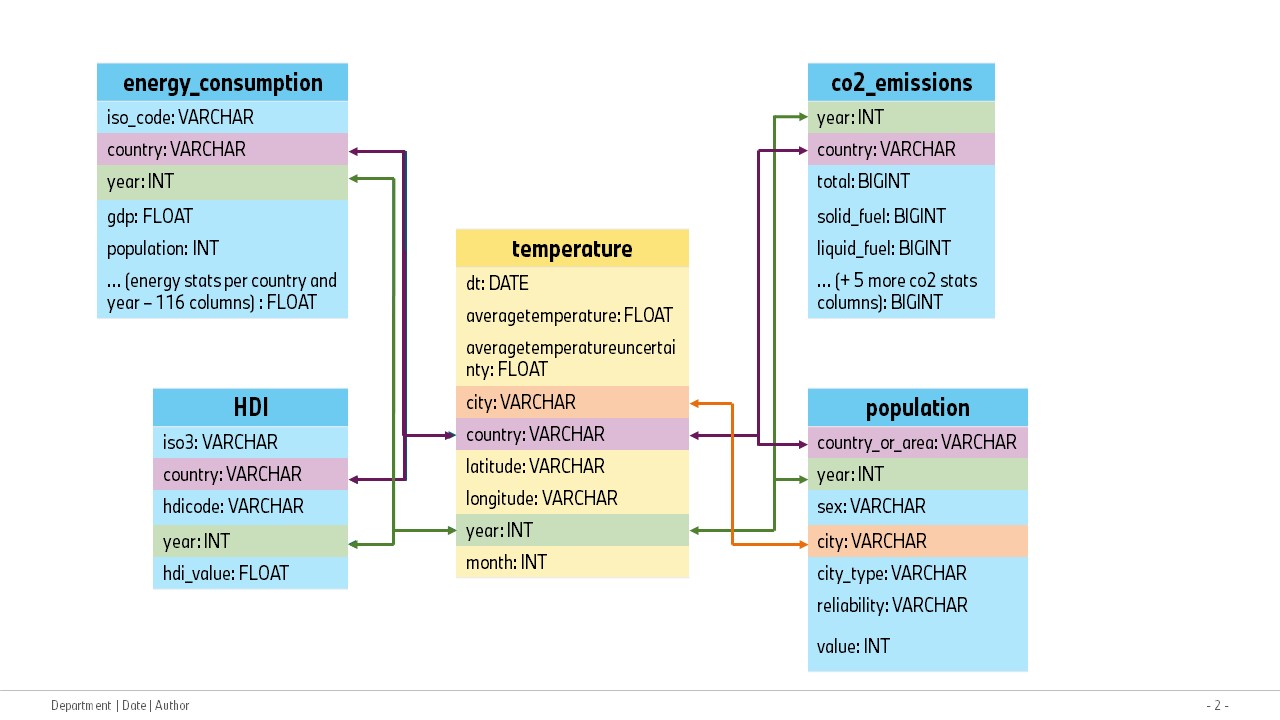

In [43]:
from IPython.display import Image
Image(filename='pictures/Data Schema_Tables.jpg')

In [32]:
import configparser
import psycopg2
import pandas as pd

In [6]:
# CONFIG
# Import Configparser to read the config in dwh.cfg
config = configparser.ConfigParser()
config.read('config/dwh.cfg')

['config/dwh.cfg']

In [7]:
# DROP TABLES
# SQL Statements for dropping the tables
temperature_table_drop = "DROP TABLE IF EXISTS temperature;"
energy_table_drop = "DROP TABLE IF EXISTS energy_consumption;"
co2_table_drop = "DROP TABLE IF EXISTS co2_emissions;"
population_table_drop = "DROP TABLE IF EXISTS population;"
HDI_table_drop = "DROP TABLE IF EXISTS HDI;"

drop_table_queries = [temperature_table_drop, energy_table_drop, co2_table_drop, population_table_drop, HDI_table_drop]

In [8]:
# CREATE TABLES
# SQL Statements for creating the tables

temperature_table_create= ("""CREATE TABLE temperature (
    dt DATE NOT NULL SORTKEY,
    averagetemperature FLOAT,
    averagetemperatureuncertainty FLOAT,
    city VARCHAR NOT NULL,
    country VARCHAR NOT NULL,
    latitude VARCHAR NOT NULL,
    longitude VARCHAR NOT NULL,
    year INT NOT NULL,
    month INT NOT NULL,
    PRIMARY KEY (dt, city, country)
    );
    """)

energy_table_create= ("""CREATE TABLE energy_consumption (
    iso_code VARCHAR NOT NULL,
    country VARCHAR,
    year INT SORTKEY,
    coal_prod_change_pct FLOAT,
    coal_prod_change_twh FLOAT,
    gas_prod_change_pct FLOAT,
    gas_prod_change_twh FLOAT,
    oil_prod_change_pct FLOAT,
    oil_prod_change_twh FLOAT,
    energy_cons_change_pct FLOAT,
    energy_cons_change_twh FLOAT,
    biofuel_share_elec FLOAT,
    biofuel_elec_per_capita FLOAT,
    biofuel_cons_change_pct  FLOAT,
    biofuel_share_energy  FLOAT,
    biofuel_cons_change_twh  FLOAT,
    biofuel_consumption  FLOAT,
    biofuel_cons_per_capita  FLOAT,
    carbon_intensity_elec  FLOAT,
    coal_share_elec  FLOAT,
    coal_cons_change_pct  FLOAT,
    coal_share_energy  FLOAT,
    coal_cons_change_twh  FLOAT,
    coal_consumption  FLOAT,
    coal_elec_per_capita  FLOAT,
    coal_cons_per_capita  FLOAT,
    coal_production  FLOAT,
    coal_prod_per_capita  FLOAT,
    electricity_generation  FLOAT,
    biofuel_electricity  FLOAT,
    coal_electricity  FLOAT,
    fossil_electricity  FLOAT,
    gas_electricity  FLOAT,
    hydro_electricity  FLOAT,
    nuclear_electricity  FLOAT,
    oil_electricity  FLOAT,
    other_renewable_electricity  FLOAT,
    other_renewable_exc_biofuel_electricity  FLOAT,
    renewables_electricity  FLOAT,
    solar_electricity  FLOAT,
    wind_electricity  FLOAT,
    energy_per_gdp  FLOAT,
    energy_per_capita  FLOAT,
    fossil_cons_change_pct  FLOAT,
    fossil_share_energy  FLOAT,
    fossil_cons_change_twh  FLOAT,
    fossil_fuel_consumption  FLOAT,
    fossil_energy_per_capita  FLOAT,
    fossil_cons_per_capita  FLOAT,
    fossil_share_elec  FLOAT,
    gas_share_elec  FLOAT,
    gas_cons_change_pct  FLOAT,
    gas_share_energy  FLOAT,
    gas_cons_change_twh  FLOAT,
    gas_consumption  FLOAT,
    gas_elec_per_capita  FLOAT,
    gas_energy_per_capita  FLOAT,
    gas_production FLOAT,
    gas_prod_per_capita FLOAT,
    hydro_share_elec FLOAT,
    hydro_cons_change_pct FLOAT,
    hydro_share_energy FLOAT,
    hydro_cons_change_twh FLOAT,
    hydro_consumption FLOAT,
    hydro_elec_per_capita FLOAT,
    hydro_energy_per_capita FLOAT,
    low_carbon_share_elec FLOAT,
    low_carbon_electricity FLOAT,
    low_carbon_elec_per_capita FLOAT,
    low_carbon_cons_change_pct FLOAT,
    low_carbon_share_energy FLOAT,
    low_carbon_cons_change_twh FLOAT,
    low_carbon_consumption FLOAT,
    low_carbon_energy_per_capita FLOAT,
    nuclear_share_elec FLOAT,
    nuclear_cons_change_pct FLOAT,
    nuclear_share_energy FLOAT,
    nuclear_cons_change_twh FLOAT,
    nuclear_consumption FLOAT,
    nuclear_elec_per_capita FLOAT,
    nuclear_energy_per_capita FLOAT,
    oil_share_elec FLOAT,
    oil_cons_change_pct FLOAT,
    oil_share_energy FLOAT,
    oil_cons_change_twh FLOAT,
    oil_consumption FLOAT,
    oil_elec_per_capita FLOAT,
    oil_energy_per_capita FLOAT,
    oil_production FLOAT,
    oil_prod_per_capita FLOAT,
    other_renewables_elec_per_capita FLOAT,
    other_renewables_share_elec FLOAT,
    other_renewables_cons_change_pct FLOAT,
    other_renewables_share_energy FLOAT,
    other_renewables_cons_change_twh FLOAT,
    other_renewable_consumption FLOAT,
    other_renewables_energy_per_capita FLOAT,
    per_capita_electricity FLOAT,
    population INT,
    primary_energy_consumption FLOAT,
    renewables_elec_per_capita FLOAT,
    renewables_share_elec FLOAT,
    renewables_cons_change_pct FLOAT,
    renewables_share_energy FLOAT,
    renewables_cons_change_twh FLOAT,
    renewables_consumption FLOAT,
    renewables_energy_per_capita FLOAT,
    solar_share_elec FLOAT,
    solar_cons_change_pct FLOAT,
    solar_share_energy FLOAT,
    solar_cons_change_twh FLOAT,
    solar_consumption FLOAT,
    solar_elec_per_capita FLOAT,
    solar_energy_per_capita FLOAT,
    gdp FLOAT,
    wind_share_elec FLOAT,
    wind_cons_change_pct FLOAT,
    wind_share_energy FLOAT,
    wind_cons_change_twh FLOAT,
    wind_consumption FLOAT,
    wind_elec_per_capita FLOAT,
    wind_energy_per_capita FLOAT,
    PRIMARY KEY (country, year)
    );
    """)

co2_table_create= ("""CREATE TABLE co2_emissions (
    year INT NOT NULL SORTKEY,
    country VARCHAR NOT NULL,
    total BIGINT,
    solid_fuel BIGINT,
    liquid_fuel BIGINT,
    gas_fuel BIGINT,
    cement BIGINT,
    gas_flaring BIGINT,
    per_capita FLOAT,
    bunker_fuels_not_in_total BIGINT,
    PRIMARY KEY (country, year)
    );
    """)

pop_table_create= ("""CREATE TABLE population (
    country_or_area VARCHAR NOT NULL,
    year INT NOT NULL SORTKEY,
    sex VARCHAR NOT NULL,
    city VARCHAR NOT NULL,
    city_type VARCHAR,
    reliability VARCHAR,
    value INT,
    PRIMARY KEY (country_or_area, city, year)
    );
    """)

HDI_table_create= ("""CREATE TABLE HDI (
    iso3 VARCHAR NOT NULL,
    country VARCHAR NOT NULL,
    hdicode VARCHAR,
    year INT SORTKEY,
    hdi_value FLOAT,
    PRIMARY KEY (country, year)
    );
    """)

create_table_queries = [temperature_table_create, energy_table_create, co2_table_create, pop_table_create, HDI_table_create]

In [9]:
#Copying the cleaned data from s3 bucket to redshift tables

In [10]:
copy_temperature = ("""COPY temperature FROM {data_bucket}
    IAM_ROLE {role_arn}
    FORMAT AS PARQUET;
    """).format(data_bucket=config['S3']['temp_data'],role_arn=config['IAM_ROLE']['ARN'])

copy_energy = ("""COPY energy_consumption FROM {data_bucket}
    IAM_ROLE {role_arn}
    FORMAT AS PARQUET;
    """).format(data_bucket=config['S3']['energy_data'],role_arn=config['IAM_ROLE']['ARN'])

copy_co2 = ("""COPY co2_emissions FROM {data_bucket}
    IAM_ROLE {role_arn}
    FORMAT AS PARQUET;
    """).format(data_bucket=config['S3']['co2_data'],role_arn=config['IAM_ROLE']['ARN'])

copy_pop = ("""COPY population FROM {data_bucket}
    IAM_ROLE {role_arn}
    FORMAT AS PARQUET;
    """).format(data_bucket=config['S3']['pop_data'],role_arn=config['IAM_ROLE']['ARN'])

copy_HDI = ("""COPY HDI FROM {data_bucket}
    IAM_ROLE {role_arn}
    FORMAT AS PARQUET;
    """).format(data_bucket=config['S3']['HDI_data'],role_arn=config['IAM_ROLE']['ARN'])

copy_table_queries = [copy_temperature, copy_energy, copy_co2, copy_pop, copy_HDI]

In [11]:
def drop_tables(cur, conn):
    '''
    Function loops through all tables defined in drop_table_queries from sql_queries.py
    And drops each table if it exists
    '''
    for query in drop_table_queries:
        print("Dropping tables - Executing: " + query)
        cur.execute(query)
        conn.commit()

In [12]:
def create_tables(cur, conn):
    '''
    Function loops through all tables defined in create_tables_queries from sql_queries.py
    And creates each table listed there
    '''
    for query in create_table_queries:
        print("Creating tables - Executing: " + query)
        cur.execute(query)
        conn.commit()

In [13]:
def copy_tables(cur, conn):
    '''
    Loads the staging tables for events and songs from S3 bucket with queries from sql_queries.py
    '''
    for query in copy_table_queries:
        print('Running ' + query)
        cur.execute(query)
        conn.commit()

In [14]:
conn = psycopg2.connect("host={} dbname={} user={} password={} port={}".format(*config['CLUSTER'].values()))
cur = conn.cursor()
print("Connected to database")
print("Dropping tables")
drop_tables(cur, conn)
print("Tables dropped")
print("Creating tables")
create_tables(cur, conn)
print("Tables created")
print("Copying tables from S3")
copy_tables(cur, conn)
print("Tables have been copied from S3 to redshift")
conn.close()
print("Connection closed")

Connected to database
Dropping tables
Dropping tables - Executing: DROP TABLE IF EXISTS temperature;
Dropping tables - Executing: DROP TABLE IF EXISTS energy_consumption;
Dropping tables - Executing: DROP TABLE IF EXISTS co2_emissions;
Dropping tables - Executing: DROP TABLE IF EXISTS population;
Dropping tables - Executing: DROP TABLE IF EXISTS HDI;
Tables dropped
Creating tables
Creating tables - Executing: CREATE TABLE temperature (
    dt DATE NOT NULL SORTKEY,
    averagetemperature FLOAT,
    averagetemperatureuncertainty FLOAT,
    city VARCHAR NOT NULL,
    country VARCHAR NOT NULL,
    latitude VARCHAR NOT NULL,
    longitude VARCHAR NOT NULL,
    year INT NOT NULL,
    month INT NOT NULL,
    PRIMARY KEY (dt, city, country)
    );
    
Creating tables - Executing: CREATE TABLE energy_consumption (
    iso_code VARCHAR NOT NULL,
    country VARCHAR,
    year INT SORTKEY,
    coal_prod_change_pct FLOAT,
    coal_prod_change_twh FLOAT,
    gas_prod_change_pct FLOAT,
    gas_prod

The data has now successfully been copied to redshift. The next step will be to perform some data quality checks to ensure that all data has been copied correctly and to ensure the data quality for the analytics team.

## Step 4.2: Data Quality Checks

#### Check 1: Row count
The row count of each table in redshift must be euqal to the data it originated from:
- temperature row_count: 1110435
- energy_consumption row_count: 15630
- co2_emissions row_count: 17232
- population row_count: 28364
- HDI row_count: 6112


#### Check 2: Check values of random rows

##### temperature:
- A random sample at index 2597 of the original data shows the following values: 
- dt = datetime.date(1960, 4, 1)
- country = Denmark
- city = Århus
- averagetemperature = 5.919

##### energy_consumption:
- The following values of Morocco in 1953 occur in the original dataset:
- gas_prod_change_twh = 0.048
- gas_prod_change_pct = empty value

In [15]:
#Data quality row count queries
temperature_row_count = "SELECT COUNT(*) FROM temperature;"
energy_row_count = "SELECT COUNT(*) FROM energy_consumption;"
co2_row_count = "SELECT COUNT(*) FROM co2_emissions;"
pop_row_count = "SELECT COUNT(*) FROM population;"
HDI_row_count = "SELECT COUNT(*) FROM HDI;"

row_count_queries = [temperature_row_count, energy_row_count, co2_row_count, pop_row_count, HDI_row_count]
row_count_validation = [1110435, 15630, 17232, 28364, 6112]

In [16]:
def row_comparision(cur, conn):
    index = 0
    for query in row_count_queries:
        cur.execute(query)
        query_result = cur.fetchall()[0][0]
        if query_result == row_count_validation[index]:
            print("Query " + query + " returned the value: " + str(query_result) + ". This is the correct row count. Test passed!")
        else:
            print("Query " + query + " returned the value: " + str(query_result) + ". This is the wrong row count. Test failed!")
        index = index + 1

In [17]:
#Data quality with random value checks
temperature_check = "SELECT averagetemperature FROM temperature WHERE dt = '1960-04-01' AND country = 'Denmark' AND city = 'Århus';"
energy_check1 = ("SELECT gas_prod_change_twh FROM energy_consumption WHERE country = 'Morocco' AND year = 1953")
energy_check2 = ("SELECT gas_prod_change_pct FROM energy_consumption WHERE country = 'Morocco' AND year = 1953")

In [20]:
def random_sample_check(cur, conn):
    cur.execute(temperature_check)
    result = cur.fetchall()
    if result[0][0] == 5.919:
        print("Test passed for temperature table. Random sample value matches! Both averagetemperature values are 5.919.")
    else:
        print("Test failed for temperature table. Random sample was a temperature of 5.919 and query showed: " + str(result[0][0]))
    
    cur.execute(energy_check1)
    result = cur.fetchall()
    if result[0][0] == 0.048:
        print("Test passed for energy table. Random sample value matches! Both gas_prod_change_twh values are 0.048.")
    else:
        print("Test failed for energy table. Random sample was a gas_prod_change_twh of 0.048 and query showed: " + str(result[0][0]))
        
    cur.execute(energy_check2)
    result = cur.fetchall()
    if result[0][0] == None:
        print("Test passed for energy table. Random sample value matches! Both gas_prod_change_pct values are empty.")
    else:
        print("Test failed for energy table. Random sample was a gas_prod_change_pct of empty value and query showed: " + str(result[0][0]))

In [21]:
print("Connecting to redshift")
conn = psycopg2.connect("host={} dbname={} user={} password={} port={}".format(*config['CLUSTER'].values()))
print("Connected")
cur = conn.cursor()
print("Starting row comparision test...")
row_comparision(cur, conn)

print("Starting random sample check...")
cur = conn.cursor()
random_sample_check(cur, conn)

print("Done with the data quality tests. Connection will be closed...")
conn.close()
print("Connection closed")

Connecting to redshift
Connected
Starting row comparision test...
Query SELECT COUNT(*) FROM temperature; returned the value: 1110435. This is the correct row count. Test passed!
Query SELECT COUNT(*) FROM energy_consumption; returned the value: 15630. This is the correct row count. Test passed!
Query SELECT COUNT(*) FROM co2_emissions; returned the value: 17232. This is the correct row count. Test passed!
Query SELECT COUNT(*) FROM population; returned the value: 28364. This is the correct row count. Test passed!
Query SELECT COUNT(*) FROM HDI; returned the value: 6112. This is the correct row count. Test passed!
Starting random sample check...
Test passed for temperature table. Random sample value matches! Both averagetemperature values are 5.919.
Test passed for energy table. Random sample value matches! Both gas_prod_change_twh values are 0.048.
Test passed for energy table. Random sample value matches! Both gas_prod_change_pct values are empty.
Done with the data quality tests. Co

In [26]:
# Example SQL Queries for insights in Redshift:
stm1 = """WITH tmp AS (SELECT temp.dt, temp.year, temp.month, temp.city, temp.country, hdi.iso3, temp.averagetemperature, hdi.hdicode AS hdi_code_country, hdi.hdi_value AS hdi_country FROM
             temperature AS temp LEFT JOIN hdi on temp.country = hdi.country AND temp.year = hdi.year)
SELECT dt, year, month, city, country, iso3, averagetemperature, hdi_code_country, hdi_country FROM tmp WHERE year > 2010 AND country = 'Germany' LIMIT 10;"""

stm2 = """WITH temp2 AS (SELECT dt, year as year_old, (year + 1) as year_new, month, city, country, averagetemperature as prev_year_temp FROM temperature),
temp_full AS 
	(SELECT temp.dt, temp.year, temp.month, temp.city, temp.country, temp.averagetemperature, temp2.prev_year_temp, (temp.averagetemperature - temp2.prev_year_temp) AS diff_temperature FROM temperature AS temp LEFT JOIN temp2 ON temp.year = temp2.year_new AND temp.month = temp2.month AND temp.city = temp2.city AND temp.country = temp2.country),
tmp AS (SELECT temp.dt, temp.year, temp.month, temp.city, temp.country, hdi.iso3, temp.averagetemperature, 
     temp.prev_year_temp, temp.diff_temperature, hdi.hdicode AS hdi_code_country, hdi.hdi_value AS hdi_country 
     FROM temp_full AS temp LEFT JOIN hdi on temp.country = hdi.country AND temp.year = hdi.year),
tmp2 AS (SELECT dt, year, month, city, country, iso3, averagetemperature, prev_year_temp, diff_temperature, hdi_code_country, hdi_country FROM tmp)
SELECT hdi_code_country, AVG(diff_temperature) AS avg_temp_diff_prev_year FROM tmp2 GROUP BY hdi_code_country ORDER BY avg_temp_diff_prev_year DESC;"""

In [27]:
print("Connecting to redshift")
conn = psycopg2.connect("host={} dbname={} user={} password={} port={}".format(*config['CLUSTER'].values()))
print("Connected")
cur = conn.cursor()
print("Analyzing query 1: ")
cur.execute(stm1)
result=cur.fetchall()
print("Result of query one: ")
print(result)

Connecting to redshift
Connected
Analyzing query 1: 
Result of query one: 
[(datetime.date(2011, 12, 1), 2011, 12, 'Bottrop', 'Germany', 'DEU', 5.232, 'Very High', 0.931), (datetime.date(2011, 12, 1), 2011, 12, 'Berlin', 'Germany', 'DEU', 4.579, 'Very High', 0.931), (datetime.date(2011, 12, 1), 2011, 12, 'Bergisch Gladbach', 'Germany', 'DEU', 4.686, 'Very High', 0.931), (datetime.date(2011, 10, 1), 2011, 10, 'Bochum', 'Germany', 'DEU', 10.616, 'Very High', 0.931), (datetime.date(2011, 10, 1), 2011, 10, 'Augsburg', 'Germany', 'DEU', 5.748, 'Very High', 0.931), (datetime.date(2011, 9, 1), 2011, 9, 'Bielefeld', 'Germany', 'DEU', 15.871, 'Very High', 0.931), (datetime.date(2011, 8, 1), 2011, 8, 'Aachen', 'Germany', 'DEU', 17.58, 'Very High', 0.931), (datetime.date(2011, 5, 1), 2011, 5, 'Bonn', 'Germany', 'DEU', 14.637, 'Very High', 0.931), (datetime.date(2011, 4, 1), 2011, 4, 'Bottrop', 'Germany', 'DEU', 12.511, 'Very High', 0.931), (datetime.date(2011, 4, 1), 2011, 4, 'Berlin', 'Germany',

In [28]:
print("Analyzing query 2: ")
cur.execute(stm2)
result=cur.fetchall()
print("Result of query two: ")
print(result)
print("Done example queries. Connection will be closed...")
conn.close()
print("Connection closed")

Analyzing query 2: 
Result of query two: 
[('Low', 0.0346500213401622), ('High', 0.0246300981591431), ('Medium', 0.0141529822431325), ('Very High', 0.00582959550448033), (None, 0.00416475739984998)]
Done example queries. Connection will be closed...
Connection closed


## Step 5: Project Write Up

### 5.1 Goal
The goal and end-usecase behind this project is to offer the analytics team a data basis for their analysis on climate change and the socio-economic effects that come with it. There is temperature data as well as energy consumption data, co2 emission, population numbers and HDI scores. Findings might include for example that climate change in temperature affects countries more than what they have contributed to it.

The idea is to have one facts dataset = Global Land Temperatures by city
Which should show the climate change in temperature values. 

Additionally we will have dimension tables with the following input:
- What is the countries energy consumption?
- What is the countries c02 fossil fuel emission?
- What is the cities population?
- What is the HDI level of the country?
The goal is to create a basis for analytics team to start their analysis on climate change and the effects on each nation. There might be statements possible like: "countries who have a low HDI level contributed way less to climate change (co2 emission, energy consumption) than high level HDI countries". So this goes also a bit in the social economic direction as well as seeing who is affected and in what ways.

Insights like these are of interest for the analytics team. The Data Engineers job is to prepare the data according to their requirements, which we will do in this project. Therefore the goal is to offer a solid and useful database that can be queried efficiently for the analytics team to find insights in.
The data will be available on AWS Redshift.

### 5.2 Choice of tools and technologies
The following tools and technologies were used in this project:
- PySpark - to deal with big data
- AWS S3 - to store the cleaned data
- AWS Redshift - to make the tables available for the analytics team

This project was a prototype. The data is not big enough to be considered big data - therefore technically Spark would have not been neccessary. Especially because in these jupyter notebook it is running on local mode, and not some bigger cluster (for example with EMR). But since this prototype might be the basis for a project with actual big data, it was written in PySpark.

AWS S3 was used for storing the wrangled data. This decision was made because the end tables were supposed to be available in AWS Redshift. The data was copied from S3 to the redshift data warehouse. 

### 5.3 Documentation of Process steps

1. Step: Data Exploration - this was done in the *01_Data_Exploration.ipynb* notebook and was neccessary to get to know the data and indentify the neccessary data wrangling steps.
2. Step: Data Wrangling - this was done in the *02_Data_Wrangling.ipynb* notebook. This notebook represents the ETL pipeline where data was extracted from the original source (csv or data packages), wrangled (transformed) and finally loaded into a AWS S3 bucket for storing.
3. Step: Creating a Redshift Cluster: this was done in *03_create_cluster.py* - this script creates a redshift cluster and lets you know the ARN and endpoint for further use.
4. Step: Creating the tables and loading data in the Redshift warehouse - this was done in the *04_create_tables.ipynb* notebook. First the tables were created with SQL statements and then afterwards filled with data through copying the wrangled data from S3. After this step it is possible for the analytics team to use the finished tables in Redshift.
5. Step: Deleting the cluster - this was done in the *05_delete_cluster.py* script. As this is only a prototype we don't want the redshift cluster to run always to save costs. Therefore after finishing the cluster is deleted again with this script.


### 5.4 Thoughts on taking this prototype into production

In the use case of production we would be assuming the following points:
- The data is increased by at least 100 times
- The data was companies data and would be feeded with new data every month (for the protoype it's static)
- The database needs to be accessed by 100+ people

In the scenario where we are dealing with actual big data, the Spark code could of course not run locally anymore. Therefore I would suggest creating an EMR cluster and have it run the script on a certain schedule.

In our case the data is static and is not updated regulary. Since the temperature data is monthly I could imagine that in a production scenario there would also be new data monthly. Therefore it would make sense to have the update schedule also run monthly. This could be done with schedules in EMR directly. Otherwise there are also options like Airflow to schedule a pipeline accordingly - but in this case the project would have to be created a bit differently.
Generally it would then make sense to have an update functionality where only the data is processed that is new. Possibly this could be achieved through filtering after month in this case.

If many people need to access a database, redshift is already a great choice. Multiple people can query the data without interfering with eachother.


### 5.5 Example queries to demonstrate the usage

In order to demonstrate the functionality I setup two example queries that could be done by the analytics team.
The first one (stm1) joins in the dimension dataset HDI in order to display the HDI value and category with the temperature data.
The second query (stm2) takes that thought even further and creates a column that shows the difference in average temperature compared to the year before. Then the HDI category is joined in and the end result is a statistics on how much on average the temperature difference between the years is grouped by the HDI category.
This could be a possible question: Do countries with low HDI have more or less change in temperature than for example very high rated HDI countries.

In [29]:
# Example SQL Queries for insights in Redshift:
stm1 = """WITH tmp AS (SELECT temp.dt, temp.year, temp.month, temp.city, temp.country, hdi.iso3, temp.averagetemperature, hdi.hdicode AS hdi_code_country, hdi.hdi_value AS hdi_country FROM
             temperature AS temp LEFT JOIN hdi on temp.country = hdi.country AND temp.year = hdi.year)
SELECT dt, year, month, city, country, iso3, averagetemperature, hdi_code_country, hdi_country FROM tmp WHERE year > 2010 AND country = 'Germany' LIMIT 10;"""

stm2 = """WITH temp2 AS (SELECT dt, year as year_old, (year + 1) as year_new, month, city, country, averagetemperature as prev_year_temp FROM temperature),
temp_full AS 
	(SELECT temp.dt, temp.year, temp.month, temp.city, temp.country, temp.averagetemperature, temp2.prev_year_temp, (temp.averagetemperature - temp2.prev_year_temp) AS diff_temperature FROM temperature AS temp LEFT JOIN temp2 ON temp.year = temp2.year_new AND temp.month = temp2.month AND temp.city = temp2.city AND temp.country = temp2.country),
tmp AS (SELECT temp.dt, temp.year, temp.month, temp.city, temp.country, hdi.iso3, temp.averagetemperature, 
     temp.prev_year_temp, temp.diff_temperature, hdi.hdicode AS hdi_code_country, hdi.hdi_value AS hdi_country 
     FROM temp_full AS temp LEFT JOIN hdi on temp.country = hdi.country AND temp.year = hdi.year),
tmp2 AS (SELECT dt, year, month, city, country, iso3, averagetemperature, prev_year_temp, diff_temperature, hdi_code_country, hdi_country FROM tmp)
SELECT hdi_code_country, AVG(diff_temperature) AS avg_temp_diff_prev_year FROM tmp2 GROUP BY hdi_code_country ORDER BY avg_temp_diff_prev_year DESC;"""

In [30]:
print("Connecting to redshift")
conn = psycopg2.connect("host={} dbname={} user={} password={} port={}".format(*config['CLUSTER'].values()))
print("Connected")
cur = conn.cursor()
print("Analyzing query 1: ")
cur.execute(stm1)
result=cur.fetchall()
print("Result of query one: ")
print(result)

Connecting to redshift
Connected
Analyzing query 1: 
Result of query one: 
[(datetime.date(2011, 12, 1), 2011, 12, 'Bottrop', 'Germany', 'DEU', 5.232, 'Very High', 0.931), (datetime.date(2011, 12, 1), 2011, 12, 'Berlin', 'Germany', 'DEU', 4.579, 'Very High', 0.931), (datetime.date(2011, 12, 1), 2011, 12, 'Bergisch Gladbach', 'Germany', 'DEU', 4.686, 'Very High', 0.931), (datetime.date(2011, 10, 1), 2011, 10, 'Bochum', 'Germany', 'DEU', 10.616, 'Very High', 0.931), (datetime.date(2011, 10, 1), 2011, 10, 'Augsburg', 'Germany', 'DEU', 5.748, 'Very High', 0.931), (datetime.date(2011, 9, 1), 2011, 9, 'Bielefeld', 'Germany', 'DEU', 15.871, 'Very High', 0.931), (datetime.date(2011, 8, 1), 2011, 8, 'Aachen', 'Germany', 'DEU', 17.58, 'Very High', 0.931), (datetime.date(2011, 5, 1), 2011, 5, 'Bonn', 'Germany', 'DEU', 14.637, 'Very High', 0.931), (datetime.date(2011, 4, 1), 2011, 4, 'Bottrop', 'Germany', 'DEU', 12.511, 'Very High', 0.931), (datetime.date(2011, 4, 1), 2011, 4, 'Berlin', 'Germany',

In [31]:
print("Analyzing query 2: ")
cur.execute(stm2)
result=cur.fetchall()
print("Result of query two: ")
print(result)
print("Done example queries. Connection will be closed...")
conn.close()
print("Connection closed")

Analyzing query 2: 
Result of query two: 
[('Low', 0.0346500213401622), ('High', 0.0246300981591431), ('Medium', 0.0141529822431325), ('Very High', 0.00582959550448033), (None, 0.00416475739984998)]
Done example queries. Connection will be closed...
Connection closed


### 5.6 Data dictionary

The following whows the data dictionaries of all 5 finished tables.
This was retrieved through the following query in Redshift: SELECT * FROM PG_TABLE_DEF WHERE schemaname='public' AND tablename = 'TABLENAME';

In [34]:
pd.read_csv("data_dictionaries/temperature.csv", sep = ';')

,tablename,column,type,sortkey,notnull,Description
0,temperature,dt,date,1,WAHR,date
1,temperature,averagetemperature,double precision,0,FALSCH,average temperature
2,temperature,averagetemperatureuncertainty,double precision,0,FALSCH,temperature uncertainty
3,temperature,city,character varying(256),0,WAHR,city
4,temperature,country,character varying(256),0,WAHR,country
5,temperature,latitude,character varying(256),0,WAHR,latitude (city)
6,temperature,longitude,character varying(256),0,WAHR,longitude (city)
7,temperature,year,integer,0,WAHR,year
8,temperature,month,integer,0,WAHR,month


In [39]:
pd.read_csv("data_dictionaries/energy_consumption.csv", sep = ';').drop(columns = ['Unnamed: 6', 'Unnamed: 7']).head(5)

,tablename,column,type,sortkey,notnull,Description
0,energy_consumption,iso_code,character varying(256),0,WAHR,iso code
1,energy_consumption,country,character varying(256),0,WAHR,country
2,energy_consumption,year,integer,1,WAHR,year
3,energy_consumption,coal_prod_change_pct,double precision,0,FALSCH,description at: https://www.kaggle.com/dataset...
4,energy_consumption,coal_prod_change_twh,double precision,0,FALSCH,description at: https://www.kaggle.com/dataset...


In [40]:
pd.read_csv("data_dictionaries/co2_emissions.csv", sep = ';')

,tablename,column,type,sortkey,notnull,Description
0,co2_emissions,year,integer,1,WAHR,year
1,co2_emissions,country,character varying(256),0,WAHR,country
2,co2_emissions,total,bigint,0,FALSCH,total emissions
3,co2_emissions,solid_fuel,bigint,0,FALSCH,emissions from solid fuel
4,co2_emissions,liquid_fuel,bigint,0,FALSCH,emissions from liquid fuel
5,co2_emissions,gas_fuel,bigint,0,FALSCH,emissions from gas fuel
6,co2_emissions,cement,bigint,0,FALSCH,emissions from cement
7,co2_emissions,gas_flaring,bigint,0,FALSCH,emissions from gas flaring
8,co2_emissions,per_capita,double precision,0,FALSCH,emissions per capita
9,co2_emissions,bunker_fuels_not_in_total,bigint,0,FALSCH,"emissions from bunker fuels, not included in t..."


In [41]:
pd.read_csv("data_dictionaries/population.csv", sep = ';')

,tablename,column,type,sortkey,notnull,Description
0,population,country_or_area,character varying(256),0,WAHR,country or area
1,population,year,integer,1,WAHR,year
2,population,sex,character varying(256),0,WAHR,sex (population number is separated by sex)
3,population,city,character varying(256),0,WAHR,city
4,population,city_type,character varying(256),0,FALSCH,city type
5,population,reliability,character varying(256),0,FALSCH,reliability - comment on how reliable it is
6,population,value,integer,0,FALSCH,value of population per sex


In [42]:
pd.read_csv("data_dictionaries/hdi.csv", sep = ';')

,tablename,column,type,sortkey,notnull,Description
0,hdi,iso3,character varying(256),0,WAHR,iso code
1,hdi,country,character varying(256),0,WAHR,country
2,hdi,hdicode,character varying(256),0,FALSCH,"hdi category (High, Medium, etc.)"
3,hdi,year,integer,1,WAHR,year
4,hdi,hdi_value,double precision,0,FALSCH,HDI value
